In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
import time, datetime
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
yf.pdr_override()

In [29]:
# importar los symbols
"""f = open('symbols.json')
symbols = json.load(f)"""

"f = open('symbols.json')\nsymbols = json.load(f)"

In [30]:
# Traer los ultimos 23 años de datos almacenados en yahoo.
twentythree_years_in_seconds = 725328000
now = time.time()
year_ago = now - twentythree_years_in_seconds
end_date = datetime.datetime.fromtimestamp(now)
start_date = datetime.datetime.fromtimestamp(year_ago)

In [85]:
# Symbol corresponde al sp500
#SYMBOL = "^GSPC"
SYMBOL = "SPY"
df_sp500 = pdr.get_data_yahoo(SYMBOL, start=start_date, end=end_date)
df_sp500.info()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5783 entries, 2000-04-03 to 2023-03-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5783 non-null   float64
 1   High       5783 non-null   float64
 2   Low        5783 non-null   float64
 3   Close      5783 non-null   float64
 4   Adj Close  5783 non-null   float64
 5   Volume     5783 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 316.3 KB


In [72]:
df_sp500.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5783.000000,5783.000000,5783.000000,5783.000000,5783.000000,5.783000e+03
mean,190.008246,191.159166,188.750274,190.017145,163.213595,1.101745e+08
std,98.392123,98.928153,97.803114,98.411352,106.101828,9.340559e+07
min,67.949997,70.000000,67.099998,68.110001,51.759579,1.436600e+06
25%,118.449997,119.209999,117.795002,118.465000,85.307869,5.131340e+07
50%,144.190002,145.029999,143.190002,144.125000,109.004349,8.238160e+07
75%,242.825005,243.915001,241.669998,242.924995,219.800392,1.426377e+08
max,479.220001,479.980011,476.059998,477.709991,468.296417,8.710263e+08


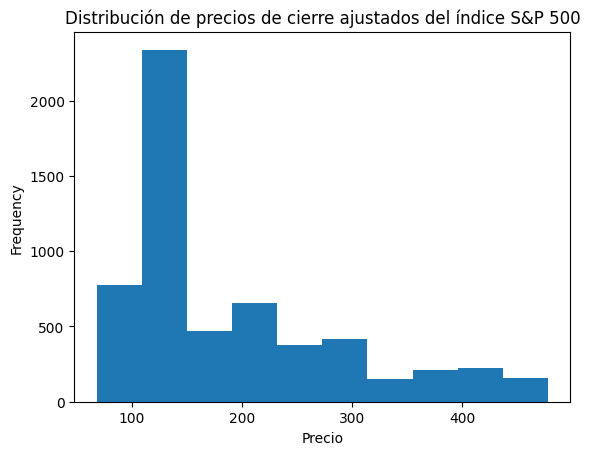

In [73]:
df_sp500['Close'].plot.hist()
plt.title('Distribución de precios de cierre ajustados del índice S&P 500')
plt.xlabel('Precio')
plt.show()

In [35]:
# Creamos una columna nueva para el dato Fecha.
df_sp500["Date"] = df_sp500.index
df_sp500.reset_index(inplace=True,drop=True)

In [36]:
df_sp500.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,150.1250,151.2500,148.687500,151.250000,98.992012,8508200,2000-04-03
1,151.7500,153.0000,141.390625,150.125000,98.255646,19585500,2000-04-04
2,147.8750,150.8125,147.625000,149.187500,97.642136,8387200,2000-04-05
3,150.2500,151.6875,149.000000,150.484375,98.490906,6378500,2000-04-06
4,151.5625,152.1250,150.500000,151.437500,99.114647,6023600,2000-04-07


## Distribuciones de variables numéricas

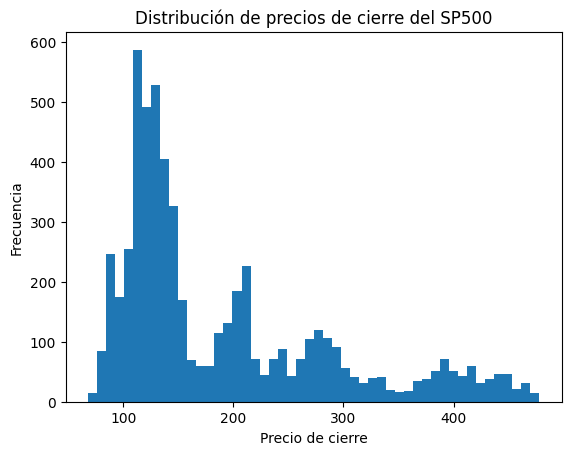

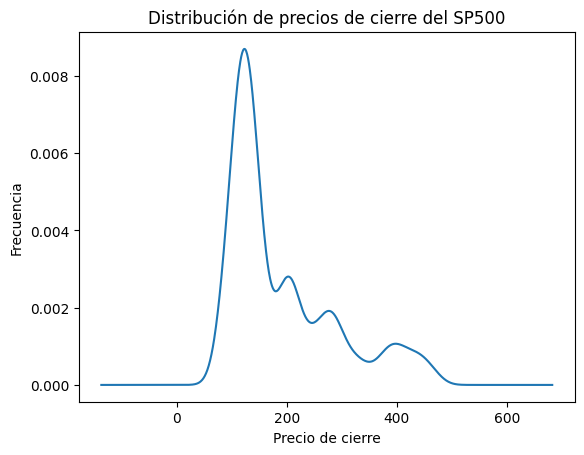

In [37]:
# Histograma para Close
plt.hist(df_sp500['Close'], bins=50)
plt.title('Distribución de precios de cierre del SP500')
plt.xlabel('Precio de cierre')
plt.ylabel('Frecuencia')
plt.show()


df_sp500['Close'].plot(kind='density')
plt.title('Distribución de precios de cierre del SP500')
plt.xlabel('Precio de cierre')
plt.ylabel('Frecuencia')
plt.show()

# Analisis univariado
## Relacion entre el precio de apertura y el precio de cierre.

In [38]:
df_sp500["Difference"] = df_sp500['Close'] - df_sp500['Adj Close']

In [39]:
df_sp500.head()

,Open,High,Low,Close,Adj Close,Volume,Date,Difference
0,150.1250,151.2500,148.687500,151.250000,98.992012,8508200,2000-04-03,52.257988
1,151.7500,153.0000,141.390625,150.125000,98.255646,19585500,2000-04-04,51.869354
2,147.8750,150.8125,147.625000,149.187500,97.642136,8387200,2000-04-05,51.545364
3,150.2500,151.6875,149.000000,150.484375,98.490906,6378500,2000-04-06,51.993469
4,151.5625,152.1250,150.500000,151.437500,99.114647,6023600,2000-04-07,52.322853


In [40]:
df_sp500.describe()

,Open,High,Low,Close,Adj Close,Volume,Difference
count,5783.000000,5783.000000,5783.000000,5783.000000,5783.000000,5.783000e+03,5783.000000
mean,190.008246,191.159166,188.750274,190.017145,163.213595,1.101745e+08,26.803550
std,98.392123,98.928153,97.803114,98.411352,106.101828,9.340559e+07,9.956568
min,67.949997,70.000000,67.099998,68.110001,51.759594,1.436600e+06,0.000000
25%,118.449997,119.209999,117.795002,118.465000,85.307892,5.131340e+07,22.449608
50%,144.190002,145.029999,143.190002,144.125000,109.004410,8.238160e+07,26.377625
75%,242.825005,243.915001,241.669998,242.924995,219.800407,1.426377e+08,34.603283
max,479.220001,479.980011,476.059998,477.709991,468.296387,8.710263e+08,52.454910


In [41]:
df_sp500["Variation"] = df_sp500["Close"].diff()

In [42]:
df_sp500.head()

,Open,High,Low,Close,Adj Close,Volume,Date,Difference,Variation
0,150.1250,151.2500,148.687500,151.250000,98.992012,8508200,2000-04-03,52.257988,NaN
1,151.7500,153.0000,141.390625,150.125000,98.255646,19585500,2000-04-04,51.869354,-1.125000
2,147.8750,150.8125,147.625000,149.187500,97.642136,8387200,2000-04-05,51.545364,-0.937500
3,150.2500,151.6875,149.000000,150.484375,98.490906,6378500,2000-04-06,51.993469,1.296875
4,151.5625,152.1250,150.500000,151.437500,99.114647,6023600,2000-04-07,52.322853,0.953125


In [43]:
df_sp500["Variation"].shape

(5783,)

In [44]:
#n = 500
#X = np.linspace(-2,3,n)

y_real = 3 * df_sp500["Variation"] - 2

y = y_real + np.random.randn(5783)

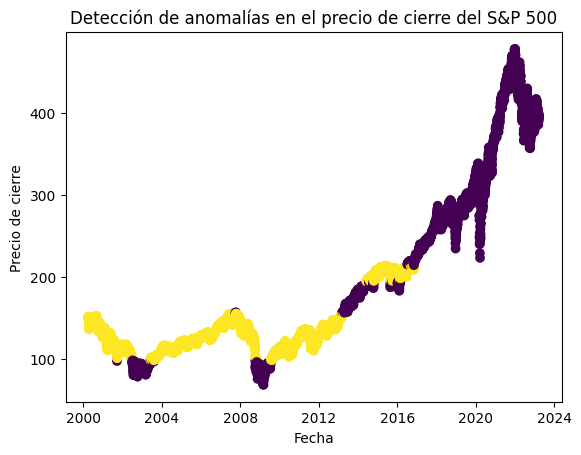

In [45]:
from sklearn.ensemble import IsolationForest

# Detección de anomalías en la serie temporal del precio de cierre del S&P 500
clf = IsolationForest(random_state=0).fit(df_sp500['Close'].values.reshape(-1,1))
anomalies = clf.predict(df_sp500['Close'].values.reshape(-1,1))

# Visualizar las anomalías en un gráfico de dispersión
plt.scatter(df_sp500["Date"], df_sp500['Close'], c=anomalies)
plt.title("Detección de anomalías en el precio de cierre del S&P 500")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre")
plt.show()

# Cálculo de estadísticas bursátiles


In [46]:
# Volatilidad
df_sp500['Yields'] = np.log(df_sp500["Close"]/df_sp500["Close"].shift(1))
volatilidad = df_sp500['Yields'].std() * np.sqrt(365)
print('Volatilidad anual es:', volatilidad)


Volatilidad anual es: 0.2381639903893103


In [47]:
# Promedio móvil
ventana = 20 # Para calcular promedio de 20 dias
df_sp500['Movil'] = df_sp500['Close'].rolling(window=ventana).mean()

In [48]:
df_sp500.head()

,Open,High,Low,Close,Adj Close,Volume,Date,Difference,Variation,Yields,Movil
0,150.1250,151.2500,148.687500,151.250000,98.992012,8508200,2000-04-03,52.257988,NaN,NaN,NaN
1,151.7500,153.0000,141.390625,150.125000,98.255646,19585500,2000-04-04,51.869354,-1.125000,-0.007466,NaN
2,147.8750,150.8125,147.625000,149.187500,97.642136,8387200,2000-04-05,51.545364,-0.937500,-0.006264,NaN
3,150.2500,151.6875,149.000000,150.484375,98.490906,6378500,2000-04-06,51.993469,1.296875,0.008655,NaN
4,151.5625,152.1250,150.500000,151.437500,99.114647,6023600,2000-04-07,52.322853,0.953125,0.006314,NaN


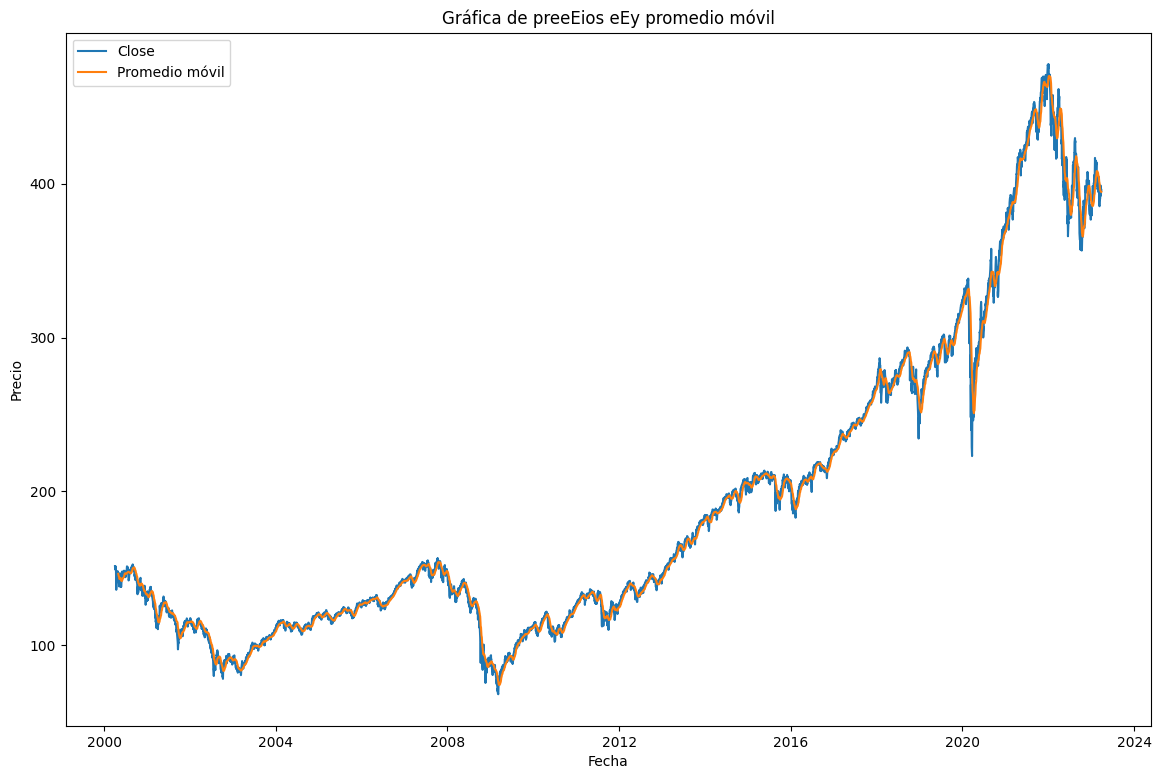

In [49]:
plt.figure(figsize=(14,9))
plt.plot(df_sp500['Date'], df_sp500['Close'], label='Close')
plt.plot(df_sp500['Date'], df_sp500['Movil'], label='Promedio móvil')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Gráfica de preeEios eEy promedio móvil')
plt.legend()
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
df_sp500.dropna(axis=0, inplace=True)

In [52]:
df_sp500.isna().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Date          0
Difference    0
Variation     0
Yields        0
Movil         0
dtype: int64

In [53]:
df_sp500.shape

(5764, 11)

In [54]:
mse = mean_squared_error(df_sp500['Close'], df_sp500['Movil'])

print('El error cuadrático medio es:', mse)

El error cuadrático medio es: 31.896185781479087


In [55]:
df_sp500['Return'] = df_sp500['Close'].pct_change()

In [56]:
df_sp500['Retorno diario IGUAL'] = np.log(df_sp500['Close']/df_sp500['Close'].shift(1))


In [57]:
df_sp500

,Open,High,Low,Close,Adj Close,Volume,Date,Difference,Variation,Yields,Movil,Return,Retorno diario IGUAL
19,146.562500,148.484375,145.843750,147.062500,96.251297,7328300,2000-05-01,50.811203,1.968750,0.013478,146.373437,NaN,NaN
20,145.500000,147.125000,144.125000,144.125000,94.328712,9411900,2000-05-02,49.796288,-2.937500,-0.020177,146.017188,-0.019975,-0.020177
21,144.000000,144.000000,139.781250,140.750000,92.119812,12630700,2000-05-03,48.630188,-3.375000,-0.023696,145.548438,-0.023417,-0.023696
22,142.000000,142.359375,140.750000,141.812500,92.815247,5963600,2000-05-04,48.997253,1.062500,0.007520,145.179688,0.007549,0.007520
23,141.062500,144.000000,140.937500,143.531250,93.940155,7862400,2000-05-05,49.591095,1.718750,0.012047,144.832031,0.012120,0.012047
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,398.730011,402.489990,392.070007,392.109985,392.109985,111746600,2023-03-22,0.000000,-6.800018,-0.017193,395.206499,-0.017046,-0.017193
5779,395.089996,399.290009,390.350006,393.170013,393.170013,119351300,2023-03-23,0.000000,1.060028,0.002700,394.831999,0.002703,0.002700
5780,391.839996,395.839996,389.399994,395.750000,395.750000,107682400,2023-03-24,0.000000,2.579987,0.006541,394.800499,0.006562,0.006541
5781,398.119995,398.920013,395.559998,396.489990,396.489990,74010400,2023-03-27,0.000000,0.739990,0.001868,394.738498,0.001870,0.001868


In [58]:
# df['Retorno diario media movil'] = df['Retorno diario'].rolling(window=20).mean()

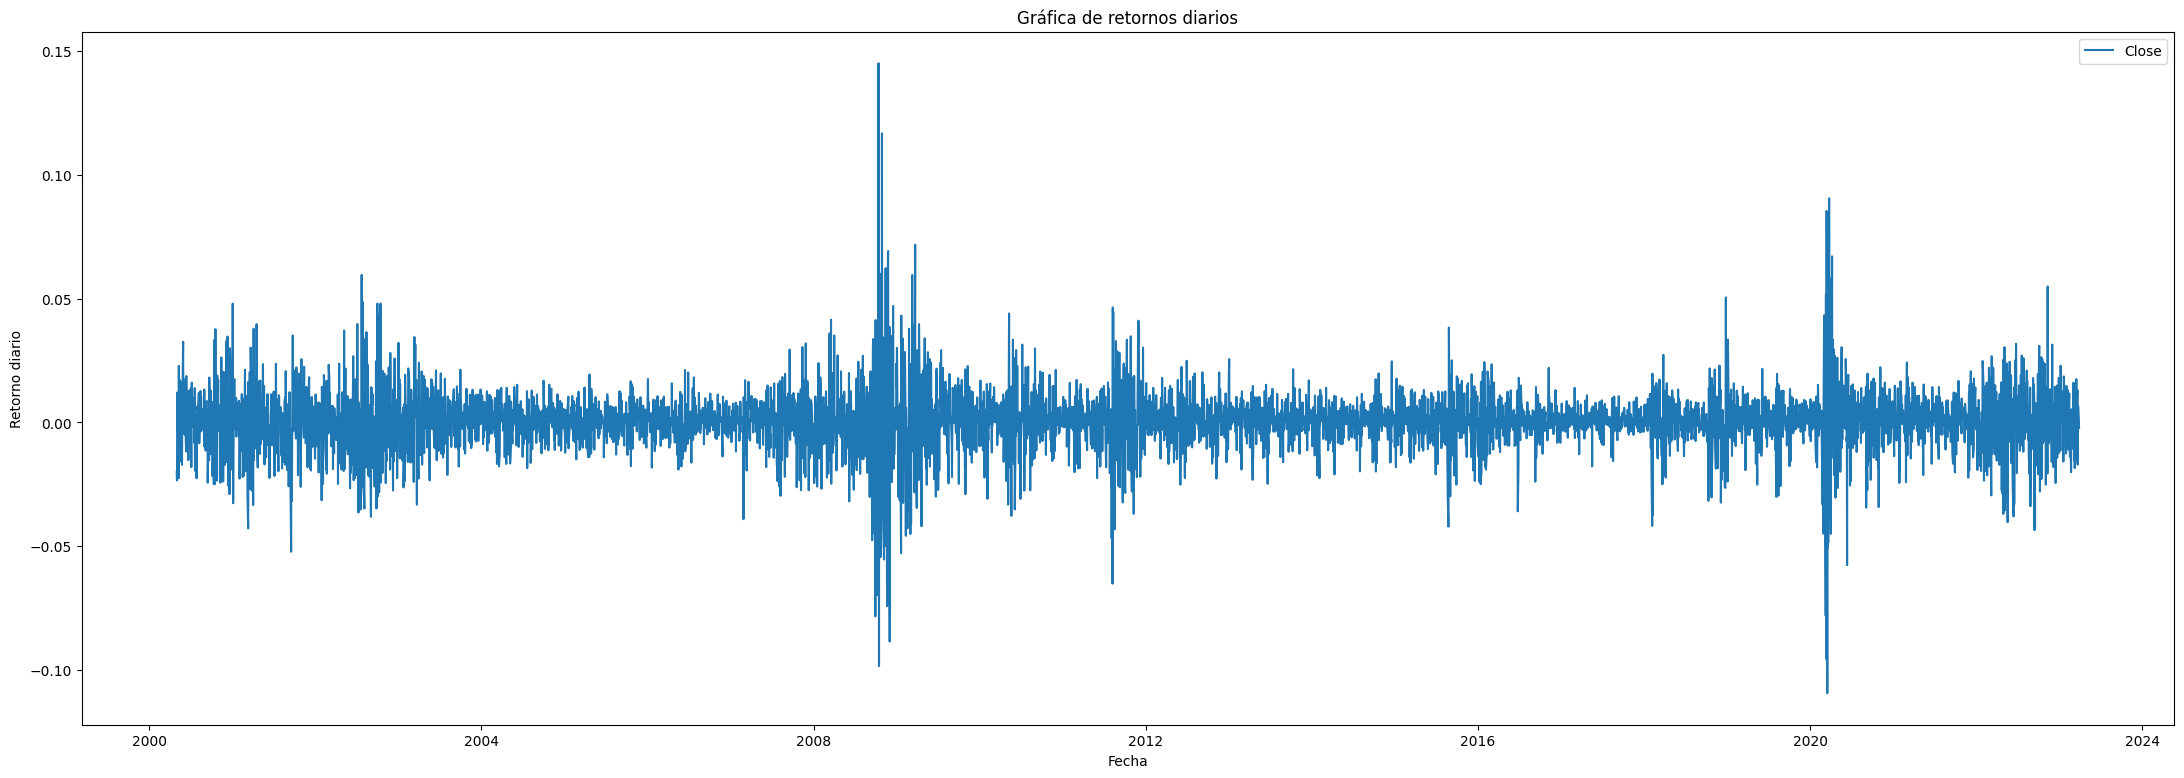

In [59]:
plt.figure(figsize=(27,9))
plt.plot(df_sp500['Date'], df_sp500['Return'], label='Close')
#plt.plot(df_sp500['Date'], df_sp500['Movil'], label='Promedio móvil')
plt.xlabel('Fecha')
plt.ylabel('Retorno diario')
plt.title('Gráfica de retornos diarios')
plt.legend()
plt.show()

In [60]:
df_sp500.dropna(axis=0, inplace=True)

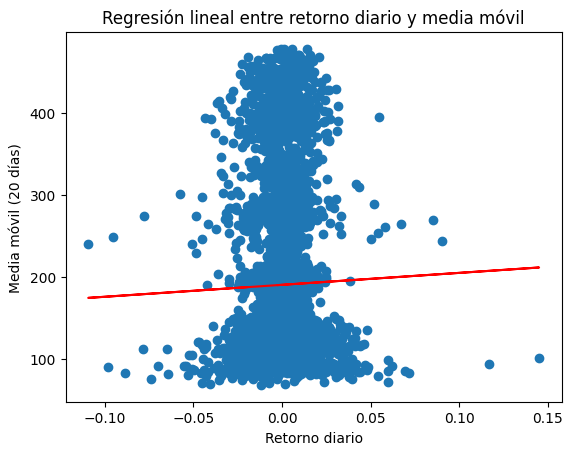

In [61]:
from sklearn.linear_model import LinearRegression

X = df_sp500['Return'].values.reshape(-1, 1)
y = df_sp500['Close'].values.reshape(-1, 1)

lr = LinearRegression()
lr.fit(X, y)

plt.scatter(X, y)
plt.plot(X, lr.predict(X), color='red')
plt.xlabel('Retorno diario')
plt.ylabel('Media móvil (20 días)')
plt.title('Regresión lineal entre retorno diario y media móvil')
plt.show()


In [62]:
y.shape

(5763, 1)

# variación de precios en el tiempo regresion lineal para predecir precios futoros


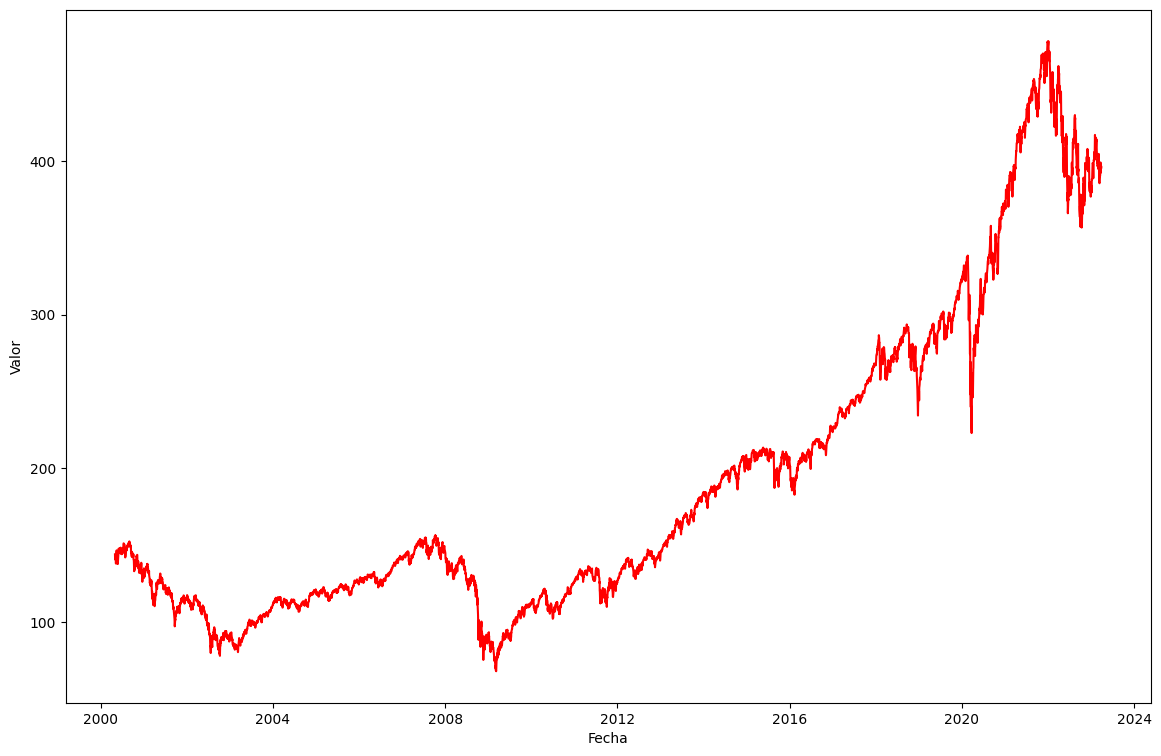

In [63]:
plt.figure(figsize=(14,9))
#plt.scatter(df_sp500.index,df_sp500["Close"], s = 15, label= 'Valores Observados', c='g')
plt.plot(df_sp500["Date"], df_sp500["Close"],label ='Curva Teórica', c = 'r')
plt.xlabel('Fecha')
plt.ylabel('Valor')
#plt.xlabel('x')
#plt.ylabel('y')
#plt.legend()
plt.show()

In [64]:
from sklearn.model_selection import train_test_split

linear_model = LinearRegression()

In [65]:
df_sp500.shape

(5763, 13)

In [66]:
df = df.dropna()

In [67]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.0,251.000000
mean,231.959668,237.487331,225.475790,231.214463,1.091455e+08,0.0,0.011952
std,61.595133,62.301018,60.242878,60.932516,4.970114e+07,0.0,0.189358
min,103.000000,111.750000,101.809998,108.099998,4.186470e+07,0.0,0.000000
25%,189.669998,194.479996,184.559998,190.195000,7.271860e+07,0.0,0.000000
50%,226.039993,233.146667,218.863327,227.539993,9.251910e+07,0.0,0.000000
75%,282.794998,288.110001,273.360001,283.136673,1.404976e+08,0.0,0.000000
max,378.766663,384.290009,362.433319,381.816681,3.065906e+08,0.0,3.000000


In [68]:
df.shape

(251, 7)

In [69]:
y_real = 3*df["Variation"] - 2

y = y_real + np.random.randn(5744)

KeyError: 'Variation'

In [ ]:
df.columns


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Date',
       'Difference', 'Variation', 'Yields', 'Movil', 'Retorno diario',
       'Retorno diario IGUAL', 'Retorno diario media movil'],
      dtype='object')

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df[["Variation", "Difference"]], y, test_size=0.30, random_state=42)

In [ ]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = linear_model.predict(X_train) # subset de entrenamiento
y_test_pred = linear_model.predict(X_test) 

In [ ]:
df[["Variation", "Difference"]].shape

(5744, 2)

In [ ]:
y.shape

(5744,)

In [ ]:
X = df[["Variation", "Difference"]]

In [ ]:
X.shape

(5744, 2)

In [ ]:
y.shape

(5744,)

ValueError: x and y must be the same size

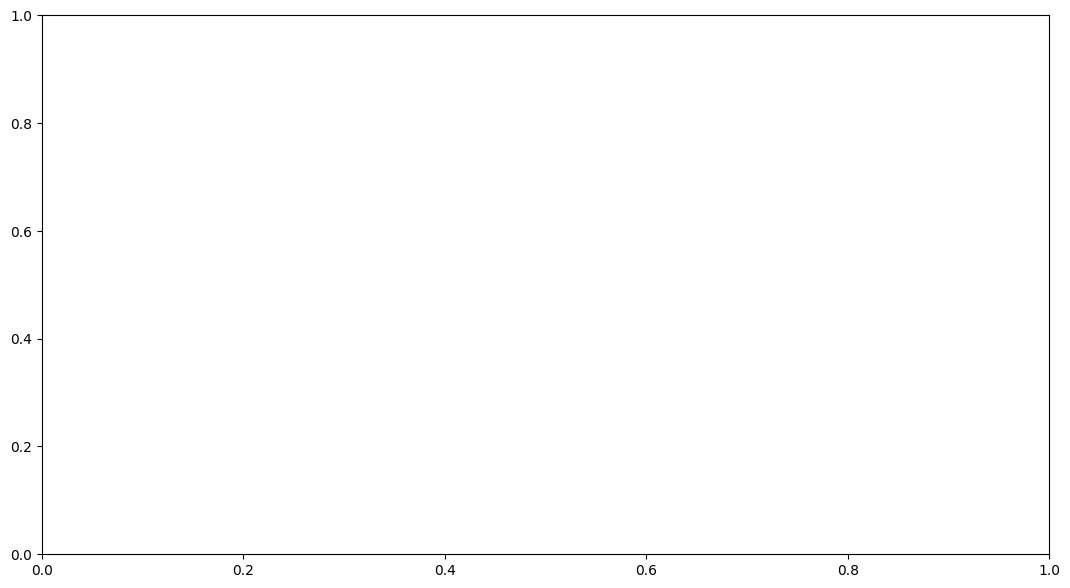

In [ ]:
plt.figure(figsize = (13,7))

plt.scatter(X, y, s = 2)
plt.plot(X, y_real, '--', label = 'Curva Teórica', c = 'r')
plt.plot(X, linear_model.predict(X), label = 'Regresion Lineal', c = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

In [ ]:
# Detectamos outliers
fig, ax = plt.subplots(figsize=(14, 6))

sns.boxplot(y=df["Variation"])

plt.title('Boxplot')

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.boxplot(x = df['Open'], y = df['difference'])

plt.title('Boxplot')

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['difference'], df["Volume"])
plt.show()

In [ ]:
x = df["Volume"][df["Volume"].between(df["Volume"].quantile(.15), df["Volume"].quantile(.85))] # without outliers
x.shape

In [ ]:
# Detectamos outliers
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(y=df["Close"])
plt.title('Boxplot')

plt.show()

# Serie de tiempo.

In [ ]:
plt.figure(figsize = (15,5))

plt.plot(df.index, df["Close"])
plt.plot(df.index, df["High"])
plt.legend()
plt.xlabel('Fecha')
#plt.ylabel('Temperatura (°C)')
plt.show()

# Correlacionamos

In [ ]:
df_corr = df.corr()
df_corr

In [ ]:
plt.figure(figsize=(10, 8))

sns.heatmap(df_corr, annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression() # Instanciamos un objeto de la clase LinearRegression. 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[["Open", "Close"]], df["Volume"], test_size=0.30, random_state=42) # Separamos nuestros 


In [ ]:
linear_model.fit(X_train, y_train)

In [ ]:
X = np.linspace(-2,3,500)
X

In [ ]:
df_sp500.to_csv('df_sp500.csv', index=False)